### User Engagement Analysis

In [1]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..')))

In [2]:
from scripts.database_connection import *
from scripts.user_engagement import *

In [3]:
# Load the data from the database
df = pd.read_csv('../data/cleaned_telecom_data.csv')

In [4]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,2019-04-04 12:01:00,770.0,2019-04-25 14:35:00,662.0,244912.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,2019-04-09 13:04:00,235.0,2019-04-25 08:15:00,606.0,244912.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,2019-04-09 17:42:00,1.0,2019-04-25 11:58:00,652.0,244912.0,2.082008e+14,3.373456e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,2019-04-10 00:31:00,486.0,2019-04-25 07:36:00,171.0,244912.0,2.082014e+14,3.373456e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,2019-04-12 20:10:00,565.0,2019-04-25 10:40:00,954.0,244912.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 150001 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150001 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150001 non-null  float64
 5   Dur. (ms)                                 150001 non-null  float64
 6   IMSI                                      150001 non-null  float64
 7   MSISDN/Number                             150001 non-null  float64
 8   IMEI                                      150001 non-null  float64
 9   Last Location Name                        150001 non-null  object 
 10  Avg RTT DL (ms)     

In [6]:
df.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.500010e+05,150001.000000,150001.000000,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,150001.000000,150001.000000,150001.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05
mean,1.013887e+19,499.188200,498.800880,99572.128983,2.082015e+14,3.366999e+10,4.847455e+13,72.862020,12.037797,11112.355328,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112120e+07,4.546434e+08
std,2.883600e+18,288.610872,288.096693,59084.184127,3.925668e+08,3.532589e+07,2.237359e+13,51.361714,11.040917,17189.349903,...,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.126923e+07,2.441421e+08
min,6.917538e+18,0.000000,0.000000,7142.000000,2.082008e+14,3.360168e+10,4.400152e+11,0.000000,0.000000,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,9.503716e+06,7.114041e+06
25%,7.349883e+18,250.000000,251.000000,57442.000000,2.082014e+14,3.365151e+10,3.546261e+13,35.000000,3.000000,43.000000,...,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322203e+07,2.431072e+08
50%,7.349883e+18,499.000000,500.000000,86399.000000,2.082015e+14,3.366380e+10,3.572241e+13,54.000000,7.000000,63.000000,...,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114324e+07,4.558409e+08
75%,1.304243e+19,749.000000,750.000000,132430.000000,2.082018e+14,3.368473e+10,8.611970e+13,109.795706,17.662883,19710.000000,...,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657051e+08
max,1.318654e+19,999.000000,999.000000,244912.000000,2.082023e+14,3.373456e+10,9.900120e+13,221.989265,39.657207,49210.500000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.275255e+07,9.029696e+08


In [7]:
print(df.isnull().sum())

Bearer Id                                   0
Start                                       1
Start ms                                    0
End                                         1
End ms                                      0
Dur. (ms)                                   0
IMSI                                        0
MSISDN/Number                               0
IMEI                                        0
Last Location Name                          0
Avg RTT DL (ms)                             0
Avg RTT UL (ms)                             0
Avg Bearer TP DL (kbps)                     0
Avg Bearer TP UL (kbps)                     0
TCP DL Retrans. Vol (Bytes)                 0
TCP UL Retrans. Vol (Bytes)                 0
DL TP < 50 Kbps (%)                         0
50 Kbps < DL TP < 250 Kbps (%)              0
250 Kbps < DL TP < 1 Mbps (%)               0
DL TP > 1 Mbps (%)                          0
UL TP < 10 Kbps (%)                         0
10 Kbps < UL TP < 50 Kbps (%)     

In [8]:
#the total data volume (in Bytes) during this session for each application
df['Youtube'] = df['Youtube DL (Bytes)'] + df['Youtube UL (Bytes)']
df['Google'] = df['Google DL (Bytes)'] + df['Google UL (Bytes)']
df['Email'] = df['Email DL (Bytes)'] + df['Email UL (Bytes)']

df['Netflix'] = df['Netflix DL (Bytes)'] + df['Netflix UL (Bytes)']
df['Gaming'] = df['Gaming DL (Bytes)'] + df['Gaming UL (Bytes)']
df['Other'] = df['Other DL (Bytes)'] + df['Other UL (Bytes)']
df['SocialMedia'] = df['Social Media DL (Bytes)'] + df['Social Media UL (Bytes)']

df['All'] = df['Total DL (Bytes)'] + df['Total UL (Bytes)']

In [9]:
User_engagement_df = df[['MSISDN/Number', 'Bearer Id', 'Dur. (ms)', 'All']].copy()

In [10]:
User_engagement_df.head()

,MSISDN/Number,Bearer Id,Dur. (ms),All
0,3.366496e+10,1.311448e+19,244912.0,345629377.0
1,3.368185e+10,1.311448e+19,244912.0,707185356.0
2,3.373456e+10,1.311448e+19,244912.0,307690973.0
3,3.373456e+10,1.311448e+19,244912.0,889352748.0
4,3.369980e+10,1.311448e+19,244912.0,607681403.0


### Session Frequency
For each customer, uniquely identified by their MSISDN/Number, we'll count the number of sessions they have based on their Bearer ID, while also calculating the total session duration and total data usage.

In [11]:
User_engagement_df = User_engagement_df.groupby(
    'MSISDN/Number').agg({'Bearer Id': 'count', 'Dur. (ms)': 'sum', 'All': 'sum'})

In [12]:
User_engagement_df

,Bearer Id,Dur. (ms),All
MSISDN/Number,,,
3.360168e+10,359,3.411218e+07,1.829512e+11
3.360171e+10,1,3.850300e+04,3.396170e+08
3.360171e+10,1,5.247800e+04,9.006109e+08
3.360171e+10,2,1.202980e+05,1.587337e+09
3.360171e+10,1,1.760220e+05,1.783307e+08
...,...,...,...
3.370000e+10,1,1.716720e+05,8.274129e+08
3.370000e+10,1,9.498000e+03,5.844009e+08
3.370000e+10,1,6.604500e+04,4.810664e+08


In [13]:
# Tope 10 users per their number of sessions
User_engagement_df.nlargest(10, "Bearer Id")

,Bearer Id,Dur. (ms),All
MSISDN/Number,,,
3.373456e+10,24383,2.433741e+09,1.202471e+13
3.360168e+10,359,3.411218e+07,1.829512e+11
3.362632e+10,18,4.004601e+06,7.971167e+09
3.361489e+10,17,3.897579e+06,8.846226e+09
3.362578e+10,17,4.135260e+06,8.499621e+09
3.365973e+10,16,3.490608e+06,7.705863e+09
3.367588e+10,15,3.330261e+06,7.891111e+09
3.366716e+10,13,3.111859e+06,5.618394e+09
3.360313e+10,12,2.853379e+06,4.976195e+09


In [14]:
# Tope 10 users per thier duration of the session
User_engagement_df.nlargest(10, "Dur. (ms)")

,Bearer Id,Dur. (ms),All
MSISDN/Number,,,
3.373456e+10,24383,2.433741e+09,1.202471e+13
3.360168e+10,359,3.411218e+07,1.829512e+11
3.362578e+10,17,4.135260e+06,8.499621e+09
3.362632e+10,18,4.004601e+06,7.971167e+09
3.361489e+10,17,3.897579e+06,8.846226e+09
3.365973e+10,16,3.490608e+06,7.705863e+09
3.367588e+10,15,3.330261e+06,7.891111e+09
3.366716e+10,13,3.111859e+06,5.618394e+09
3.360313e+10,12,2.853379e+06,4.976195e+09


In [15]:
# Tope 10 users per their sessions total traffic
User_engagement_df.nlargest(10, "All")

,Bearer Id,Dur. (ms),All
MSISDN/Number,,,
3.373456e+10,24383,2.433741e+09,1.202471e+13
3.360168e+10,359,3.411218e+07,1.829512e+11
3.361489e+10,17,3.897579e+06,8.846226e+09
3.362578e+10,17,4.135260e+06,8.499621e+09
3.362632e+10,18,4.004601e+06,7.971167e+09
3.367588e+10,15,3.330261e+06,7.891111e+09
3.365973e+10,16,3.490608e+06,7.705863e+09
3.366646e+10,11,2.595320e+06,7.308501e+09
3.366471e+10,11,2.602195e+06,6.872347e+09


Normalize each engagement metric and run a k-means (k=3) to classify customers
in three groups of engagement.

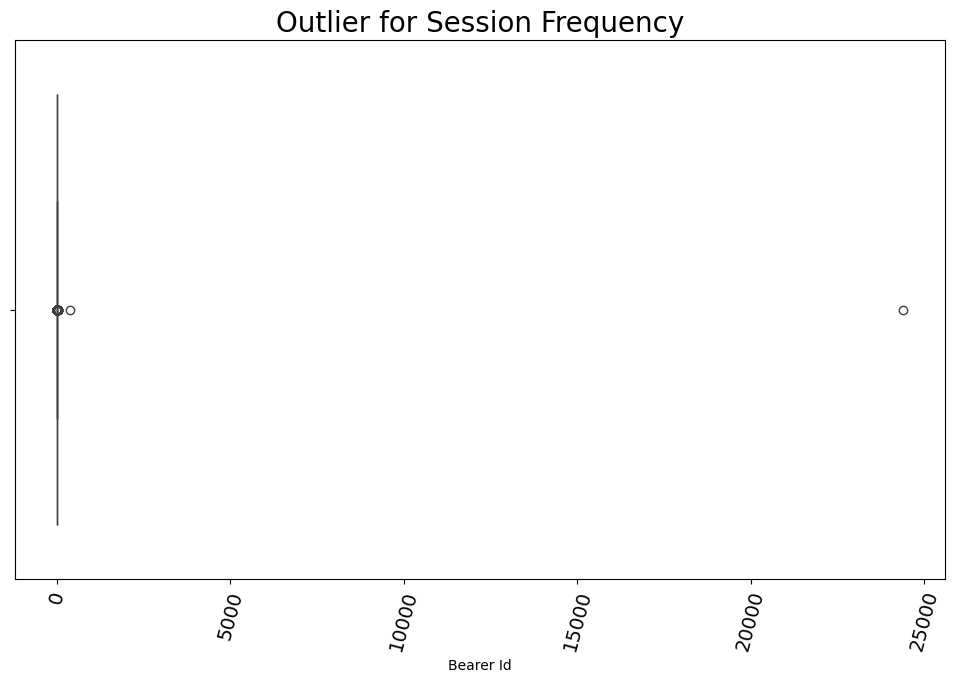

In [16]:
box_plot(User_engagement_df, 'Bearer Id', 'Outlier for Session Frequency')

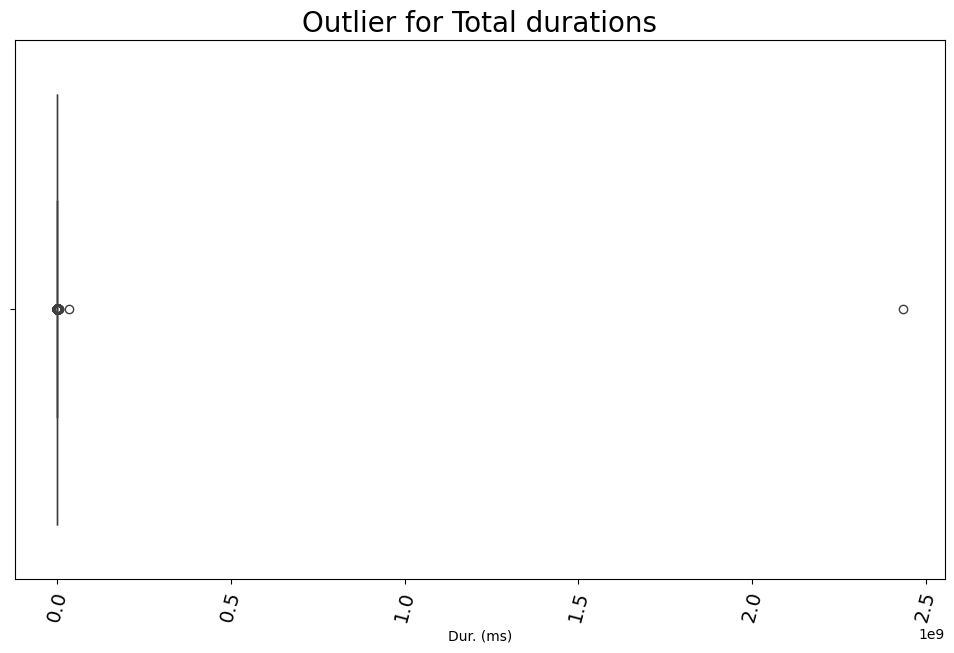

In [17]:
box_plot(User_engagement_df, 'Dur. (ms)', 'Outlier for Total durations')

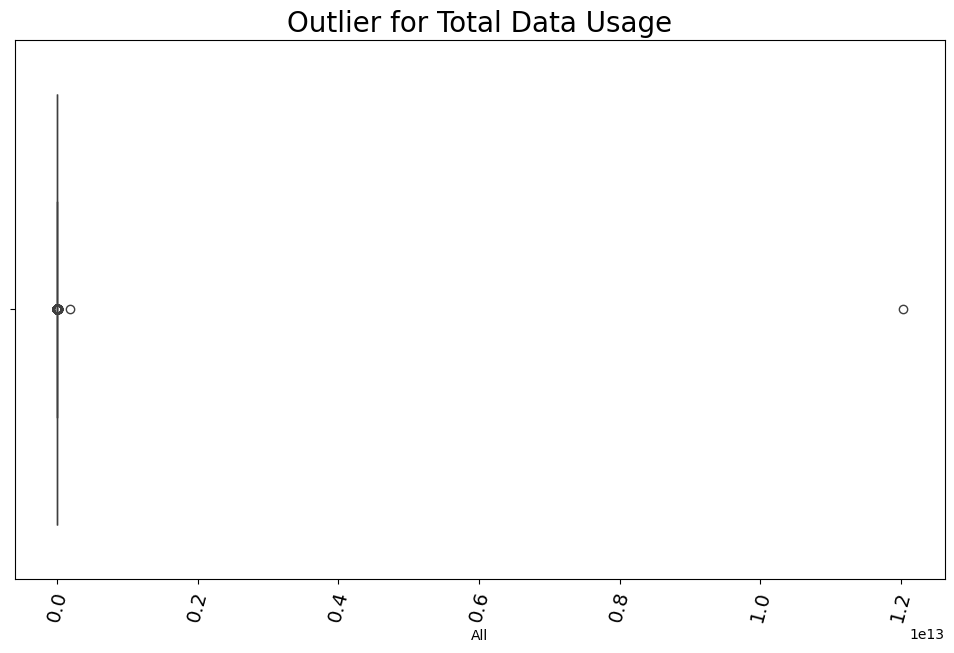

In [18]:
box_plot(User_engagement_df, 'All', 'Outlier for Total Data Usage')